In [1]:
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates

pd.set_option('display.max_columns', None)
pd.set_option("max_rows", 40)

df = pandas.read_csv('./../data/USD000UTSTOM-20220512.csv', sep=',')
df

,figi,direction,price,quantity,time
0,BBG0013HGFT4,2,66.93,2,2022-05-12 06:59:40.000904+00:00
1,BBG0013HGFT4,2,66.93,1,2022-05-12 06:59:40.000904+00:00
2,BBG0013HGFT4,2,66.93,2,2022-05-12 06:59:40.000904+00:00
3,BBG0013HGFT4,2,66.93,10,2022-05-12 06:59:40.000904+00:00
4,BBG0013HGFT4,2,66.93,3,2022-05-12 06:59:40.000904+00:00
...,...,...,...,...,...
60374,BBG0013HGFT4,2,63.34,5,2022-05-12 15:59:56.763665+00:00
60375,BBG0013HGFT4,2,63.30,2,2022-05-12 15:59:56.763665+00:00
60376,BBG0013HGFT4,2,63.30,1,2022-05-12 15:59:56.763665+00:00
60377,BBG0013HGFT4,2,63.30,1,2022-05-12 15:59:56.763665+00:00


In [2]:
df.time = pd.to_datetime(df.time)
# df.price = pd.to_numeric(df.price)
df.quantity = pd.to_numeric(df.quantity)

In [6]:
time_quantity = df.groupby(pd.Grouper(key='time', freq='1min'))[['quantity']].sum()
time_quantity

,quantity
time,
2022-05-12 06:59:00+00:00,22
2022-05-12 07:00:00+00:00,3052
2022-05-12 07:01:00+00:00,6430
2022-05-12 07:02:00+00:00,2588
2022-05-12 07:03:00+00:00,1626
...,...
2022-05-12 15:55:00+00:00,126
2022-05-12 15:56:00+00:00,683
2022-05-12 15:57:00+00:00,796


In [4]:
#кластера за ТФ
time_quantity = df.groupby([pd.Grouper(key='time', freq='1min'), 'price'])[['quantity']].sum()
time_quantity

quantity
time                      price            
2022-05-12 06:59:00+00:00 66.9300        22
2022-05-12 07:00:00+00:00 66.3750         3
                          66.3775        51
                          66.5000       873
                          66.5025       476
...                                     ...
2022-05-12 15:59:00+00:00 63.3300        18
                          63.3400        52
                          63.3475        53
                          63.3500       261
                          63.3600       260

[11957 rows x 1 columns]

In [5]:
#кластера за ТФ
time_quantity = df.groupby([pd.Grouper(key='time', freq='1min'), 'price'])[['quantity']].sum()
time_quantity

quantity
time                      price            
2022-05-12 06:59:00+00:00 66.9300        22
2022-05-12 07:00:00+00:00 66.3750         3
                          66.3775        51
                          66.5000       873
                          66.5025       476
...                                     ...
2022-05-12 15:59:00+00:00 63.3300        18
                          63.3400        52
                          63.3475        53
                          63.3500       261
                          63.3600       260

[11957 rows x 1 columns]

In [6]:
#максимумы в кластерах за ТФ
time_quantity.reset_index(level='time').groupby('time')['quantity'].idxmax().reset_index(name='price')

,time,price
0,2022-05-12 06:59:00+00:00,66.93
1,2022-05-12 07:00:00+00:00,66.50
2,2022-05-12 07:01:00+00:00,66.50
3,2022-05-12 07:02:00+00:00,66.43
4,2022-05-12 07:03:00+00:00,66.68
...,...,...
536,2022-05-12 15:55:00+00:00,63.40
537,2022-05-12 15:56:00+00:00,63.35
538,2022-05-12 15:57:00+00:00,63.30
539,2022-05-12 15:58:00+00:00,63.30


In [8]:
# макс объем за период
s = df.groupby(pd.Grouper(key='time', freq='1Min')).quantity.idxmax()
out = df.loc[s].set_index(['time'])
out[0:15]
# s

,figi,direction,price,quantity
time,,,,
2022-05-12 06:59:40.000904+00:00,BBG0013HGFT4,2,66.9300,10
2022-05-12 07:00:07.707180+00:00,BBG0013HGFT4,2,66.5000,200
2022-05-12 07:01:22.059847+00:00,BBG0013HGFT4,2,66.5000,1000
2022-05-12 07:02:16.418898+00:00,BBG0013HGFT4,2,66.4300,104
2022-05-12 07:03:41.038598+00:00,BBG0013HGFT4,2,66.6800,200
2022-05-12 07:04:58.275350+00:00,BBG0013HGFT4,1,66.8325,95
2022-05-12 07:05:51.765498+00:00,BBG0013HGFT4,1,66.9675,250
2022-05-12 07:06:21.868208+00:00,BBG0013HGFT4,2,67.0150,222
2022-05-12 07:07:54.733655+00:00,BBG0013HGFT4,2,66.9250,209


In [9]:
time_quantity = df.groupby([pd.Grouper(key='time', freq='1min'), 'price'])[['quantity']].sum()
result = time_quantity.reset_index(level='time').groupby('time')['quantity'].idxmax().reset_index(name='price')
result[0:15]

,time,price
0,2022-05-12 06:59:00+00:00,66.9300
1,2022-05-12 07:00:00+00:00,66.5000
2,2022-05-12 07:01:00+00:00,66.5000
3,2022-05-12 07:02:00+00:00,66.4300
4,2022-05-12 07:03:00+00:00,66.6800
5,2022-05-12 07:04:00+00:00,66.7500
6,2022-05-12 07:05:00+00:00,66.8700
7,2022-05-12 07:06:00+00:00,66.9850
8,2022-05-12 07:07:00+00:00,66.9250
9,2022-05-12 07:08:00+00:00,66.9700


In [10]:
# df = df.astype({'time':'datetime64'})
grouped = df.set_index(['time'])
candles = grouped['price'].resample('1Min').ohlc()
candles = candles[['open', 'close', 'high', 'low']]
candles

,open,close,high,low
time,,,,
2022-05-12 06:59:00+00:00,66.9300,66.9300,66.9300,66.9300
2022-05-12 07:00:00+00:00,66.9300,66.7000,66.9850,66.3750
2022-05-12 07:01:00+00:00,66.6675,66.4000,66.6675,66.3000
2022-05-12 07:02:00+00:00,66.4000,66.4950,66.5225,66.3425
2022-05-12 07:03:00+00:00,66.5375,66.6575,66.7050,66.5050
...,...,...,...,...
2022-05-12 15:55:00+00:00,63.4000,63.3900,63.4000,63.3625
2022-05-12 15:56:00+00:00,63.3900,63.3200,63.4000,63.3200
2022-05-12 15:57:00+00:00,63.3475,63.2600,63.3550,63.2600


In [11]:
import numpy as np
def agg_ohlcv(x):
    price = x['price'].values
    quantity = x['quantity'].values

    names = {
        'low': min(price) if len(price) > 0 else np.nan,
        'high': max(price) if len(price) > 0 else np.nan,
        'open': price[0] if len(price) > 0 else np.nan,
        'close': price[-1] if len(price) > 0 else np.nan,
#         'total_volume': sum(quantity) if len(quantity) > 0 else 0,
        'total_volume': 0,
        'max_volume_price': x.groupby(['price'])[['quantity']].sum().idxmax()[0]
    }
    return pd.Series(names)
candles = df.set_index(['time'])
candles = candles.resample('1min').apply(agg_ohlcv)
candles = candles.ffill()

candles.loc[candles['close'] == candles['open'], 'direction'] = 0 # свеча доджи
candles.loc[candles['close'] > candles['open'], 'direction'] = 1 # бычья свеча
candles.loc[candles['open'] > candles['close'], 'direction'] = 2 # медвежья свеча
candles['time'] = candles.index

candles = candles[['time', 'open', 'close', 'high', 'low', 'total_volume', 'direction', 'max_volume_price']]
candles = candles.reset_index(drop=True)

candles['valid_buy_entry_point'] = np.where(
    candles['time'].isin([]) & candles['direction'] == 1, candles['low'] - (
                    candles['low'] * 0.007 / 100), np.nan)
candles

,time,open,close,high,low,total_volume,direction,max_volume_price,valid_buy_entry_point
0,2022-05-12 06:59:00+00:00,66.9300,66.9300,66.9300,66.9300,0.0,0.0,66.93,NaN
1,2022-05-12 07:00:00+00:00,66.9300,66.7000,66.9850,66.3750,0.0,2.0,66.50,NaN
2,2022-05-12 07:01:00+00:00,66.6675,66.4000,66.6675,66.3000,0.0,2.0,66.50,NaN
3,2022-05-12 07:02:00+00:00,66.4000,66.4950,66.5225,66.3425,0.0,1.0,66.43,NaN
4,2022-05-12 07:03:00+00:00,66.5375,66.6575,66.7050,66.5050,0.0,1.0,66.68,NaN
...,...,...,...,...,...,...,...,...,...
536,2022-05-12 15:55:00+00:00,63.4000,63.3900,63.4000,63.3625,0.0,2.0,63.40,NaN
537,2022-05-12 15:56:00+00:00,63.3900,63.3200,63.4000,63.3200,0.0,2.0,63.35,NaN
538,2022-05-12 15:57:00+00:00,63.3475,63.2600,63.3550,63.2600,0.0,2.0,63.30,NaN
539,2022-05-12 15:58:00+00:00,63.2975,63.3600,63.3600,63.2600,0.0,1.0,63.30,NaN


In [12]:
data = candles[:40]
# candles.loc[candles['close'] > candles['open'], 'direction'] = 1 # бычья свеча



# процентное соотношение лонгистов/шортистов в свече
difference = data['high'] - data['low']
long_ratio = (data['close'] - data['low']) / difference * 100
short_ratio = (data['high'] - data['close']) / difference * 100

ratio_df = pd.DataFrame(columns=['long', 'short'])
ratio_df['long'] = long_ratio
ratio_df['short'] = short_ratio

# расчет расположения макс. объема относительно открытия свечи
from_high = abs(data['high'] - data['max_volume_price'])
from_low = abs(data['max_volume_price'] - data['low'])
total = from_high + from_low
ratio_df.loc[data['direction'] == 1, 'percent'] = from_low / total * 100
ratio_df.loc[data['direction'] == 2, 'percent'] = from_high / total * 100

ratio_df['direction'] = data['direction']
ratio_df['time'] = data['time']

# определение победителя: 
# если соотношение лонгистов больше и макс объем как можно ниже, то приоритет для лонга
# если соотношение шортистов больше и макс объем как можно выше, то приоритет для шорта
ratio_df.loc[ratio_df['direction'] == 1, 'win'] = (ratio_df['long'] > 50) & (ratio_df['percent'] <= 40)
ratio_df.loc[ratio_df['direction'] == 2, 'win'] = (ratio_df['short'] > 50) & (ratio_df['percent'] <= 40)

ratio_df

,long,short,percent,direction,time,win
0,NaN,NaN,NaN,0.0,2022-05-12 06:59:00+00:00,NaN
1,53.278689,46.721311,79.508197,2.0,2022-05-12 07:00:00+00:00,False
2,27.210884,72.789116,45.578231,2.0,2022-05-12 07:01:00+00:00,False
3,84.722222,15.277778,48.611111,1.0,2022-05-12 07:02:00+00:00,False
4,76.250000,23.750000,87.500000,1.0,2022-05-12 07:03:00+00:00,False
5,65.625000,34.375000,62.500000,1.0,2022-05-12 07:04:00+00:00,False
6,85.714286,14.285714,42.857143,1.0,2022-05-12 07:05:00+00:00,False
7,68.333333,31.666667,45.000000,1.0,2022-05-12 07:06:00+00:00,False
8,36.666667,63.333333,63.333333,2.0,2022-05-12 07:07:00+00:00,False
9,70.689655,29.310345,29.310345,1.0,2022-05-12 07:08:00+00:00,True


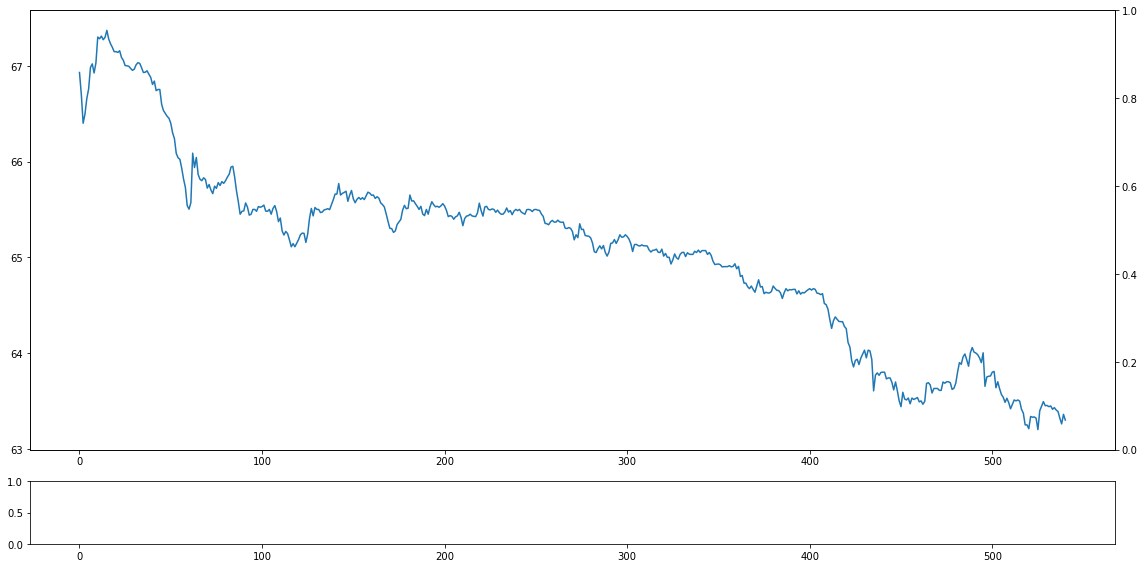

In [13]:
fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax3 = ax1.twinx()
fig.tight_layout()
# plt.show()

ax1.clear()
ax1.plot(candles.index, candles['close'])
plt.show(block=False)

In [3]:
# merge df
new_df = pandas.read_csv('./../data/temp/SBER-20220506.csv', sep=',')
new_df.time = pd.to_datetime(new_df.time)

source_df = pandas.read_csv('./../data/SBER-20220506.csv', sep=',')
source_df.time = pd.to_datetime(source_df.time)
# df3.price = pd.to_numeric(df.price)
# df3.quantity = pd.to_numeric(df.quantity)
# df3[:1000].to_dict('records')

first_time = new_df.iloc[0]['time']
last_time = new_df.iloc[-1]['time']
search_condition = (source_df['time'] >= first_time) & (source_df['time'] <= last_time)

result_df = source_df.drop(source_df.loc[search_condition].index)
result_df = pd.concat([result_df, new_df]).rename_axis('index')
result_df = result_df.sort_values(['time', 'index']).reset_index(drop=True)

result_df.to_csv('./../data/SBER-20220506-merge-test.csv', mode='a', header=True, index=False)

In [15]:
import numpy as np
pd.set_option("max_rows", None)

df1 = pandas.read_csv('./../data/USD000UTSTOM-20220512.csv', sep=',')
df1.time = pd.to_datetime(df1.time)
df1.price = pd.to_numeric(df1.price)
df1.quantity = pd.to_numeric(df1.quantity)

def agg_ohlcv(x):
#     print(x)
    if x.empty:
        return pd.Series({
            'low': 0,
            'high': 0,
            'open': 0,
            'close': 0,
            'total_volume': 0,
            'max_volume_price': 0
        })
    
    price = x['price'].values
    quantity = x['quantity'].values

    names = {
        'low': min(price) if len(price) > 0 else np.nan,
        'high': max(price) if len(price) > 0 else np.nan,
        'open': price[0] if len(price) > 0 else np.nan,
        'close': price[-1] if len(price) > 0 else np.nan,
        'total_volume': sum(quantity) if len(quantity) > 0 else 0,
#         'total_volume': 0,
        'max_volume_price': x.groupby(['price'])[['quantity']].sum().idxmax()[0]
    }
    return pd.Series(names)
candles = df1.set_index(['time'])
candles = candles.resample('1min').apply(agg_ohlcv)
candles = candles.ffill()

candles.loc[candles['close'] == candles['open'], 'direction'] = 0 # свеча доджи
candles.loc[candles['close'] > candles['open'], 'direction'] = 1 # бычья свеча
candles.loc[candles['open'] > candles['close'], 'direction'] = 2 # медвежья свеча
candles['time'] = candles.index

candles = candles[['time', 'open', 'close', 'high', 'low', 'total_volume', 'direction', 'max_volume_price']]
candles = candles.reset_index(drop=True)

candles

,time,open,close,high,low,total_volume,direction,max_volume_price
0,2022-05-12 06:59:00+00:00,66.9300,66.9300,66.9300,66.9300,22.0,0.0,66.9300
1,2022-05-12 07:00:00+00:00,66.9300,66.7000,66.9850,66.3750,3052.0,2.0,66.5000
2,2022-05-12 07:01:00+00:00,66.6675,66.4000,66.6675,66.3000,6430.0,2.0,66.5000
3,2022-05-12 07:02:00+00:00,66.4000,66.4950,66.5225,66.3425,2588.0,1.0,66.4300
4,2022-05-12 07:03:00+00:00,66.5375,66.6575,66.7050,66.5050,1626.0,1.0,66.6800
5,2022-05-12 07:04:00+00:00,66.6000,66.7575,66.8400,66.6000,1934.0,1.0,66.7500
6,2022-05-12 07:05:00+00:00,66.8100,66.9825,67.0200,66.7575,5288.0,1.0,66.8700
7,2022-05-12 07:06:00+00:00,66.9800,67.0200,67.0675,66.9175,4661.0,1.0,66.9850
8,2022-05-12 07:07:00+00:00,67.0100,66.9250,67.0200,66.8700,2480.0,2.0,66.9250
9,2022-05-12 07:08:00+00:00,66.9500,67.0300,67.0725,66.9275,5215.0,1.0,66.9700
